<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab8(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### **Environment Setup**
Let's first define the 1D grid-world environment. The agent can take actions to move either left or right. If the agent reaches the goal state (state 5), it receives a positive reward and the episode ends.

**Defining the Environment**

- GridWorld class: The GridWorld class models a 1D grid with 5 states, where the agent starts at state 1 and moves towards state 5 (the goal state).
- reset(): Resets the agent's position to the starting state (state 1).
- step(action): Takes an action (0 for left, 1 for right) and moves the agent accordingly. If the agent reaches the goal (state 5), it receives a positive reward (+1) and the episode ends. Otherwise, it receives a negative reward (-1).
- visualize(agent_path): Prints the grid, showing the agent's path (A for agent and G for goal).

In [7]:
class GridWorld:
    def __init__(self, size=5, goal_state=5):
        self.size = size
        self.goal_state = goal_state
        self.current_state = 1

    def reset(self):
        """Resets the environment to the initial state (state 1)."""
        self.current_state = 1
        return self.current_state

    def step(self, action):
        """Take an action and return the next state, reward, and done flag."""
        if action == 1:
            self.current_state = min(self.size, self.current_state + 1)
        elif action == 0:
            self.current_state = max(1, self.current_state - 1)

        if self.current_state == self.goal_state:
            return self.current_state, 1, True
        else:
            return self.current_state, -1, False

    def visualize(self, agent_path=None):
        """Visualize the 1D grid and agent's path."""
        plt.figure(figsize=(10, 2))
        grid = ['|'] * self.size

        grid[self.goal_state - 1] = 'G'

        if agent_path is not None:
            for state in agent_path:
                grid[state - 1] = 'A'

        plt.plot(range(1, self.size + 1), [1] * self.size, color='black', marker='o', markersize=10, label='States')
        plt.text(self.goal_state, 1.05, 'G', horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='green')  # Goal text

        if agent_path:
            plt.plot(agent_path, [1] * len(agent_path), 'ro-', label="Agent's Path")

        if agent_path:
            current_position = agent_path[-1]
            plt.text(current_position, 1.05, 'A', horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='red')  # Current agent position

        plt.yticks([])
        plt.xticks(range(1, self.size + 1))
        plt.xlim(0.5, self.size + 0.5)
        plt.title('1D Grid World: Agent Movement & State Visualization')
        plt.legend()
        plt.show()

**2. Defining the Agent (TD(0) Implementation)**

Now, let's define an agent that uses TD(0) to learn the state-value function
𝑉
(
𝑠
)
 for this environment.

- **Initialization**: Initializes the state-value function \( V(s) \) for each state to zero, along with the learning rate $ \alpha $ and discount factor $ \gamma$.
- **choose_action(state)**: Randomly selects an action for simplicity, but this can be extended to use policies like epsilon-greedy.
- **update(state, reward, next_state)**: Implements the TD(0) update rule.
     This combines the immediate reward and the expected future reward from the next state to update the value of the current state.
- **learn(episodes)**: Runs multiple episodes of learning, updating the state-value function using TD(0). The agent’s path in each episode is recorded for visualization.

In [2]:
class TD0Agent:
    def __init__(self, env, alpha=0.1, gamma=0.9):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.V = np.zeros(env.size)

    def choose_action(self, state):
        """Choose an action (0 for left, 1 for right) randomly."""
        return np.random.choice([0, 1])

    def update(self, state, reward, next_state):
        """Update the state-value function using TD(0) update rule."""
        td_target = reward + self.gamma * self.V[next_state - 1]
        td_error = td_target - self.V[state - 1]
        self.V[state - 1] += self.alpha * td_error

    def learn(self, episodes=100):
        """Train the agent using TD(0) algorithm over multiple episodes."""
        agent_path = []
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            total_reward = 0
            path = []

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update(state, reward, next_state)
                state = next_state
                total_reward += reward
                path.append(state)

            agent_path.append(path)

            if episode % 10 == 0:
                print(f"Episode {episode+1}: Total Reward: {total_reward}")
                self.env.visualize(path)

        return agent_path

### **3. Running the Simulation**

Now that we have defined the environment and agent, we will train the agent for 100 episodes and visualize how the agent moves through the grid. Additionally, we'll track how the state-value function evolves over time.

- We create an instance of the GridWorld and TD0Agent classes.
- We train the agent over 100 episodes using the learn() method, during which the agent updates its state-value function based on the TD(0) algorithm.
- After training, we print the final state-value function and visualize the last path the agent took.


Episode 1: Total Reward: -6


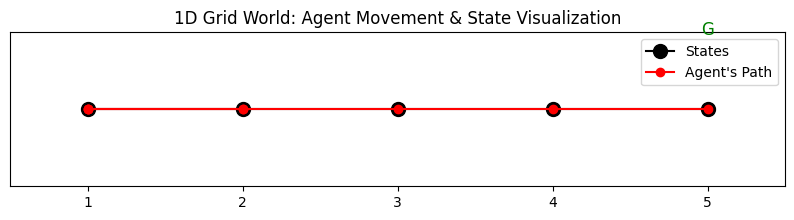

Episode 11: Total Reward: -4


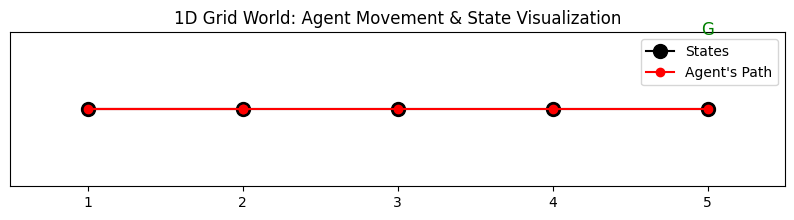

Episode 21: Total Reward: -6


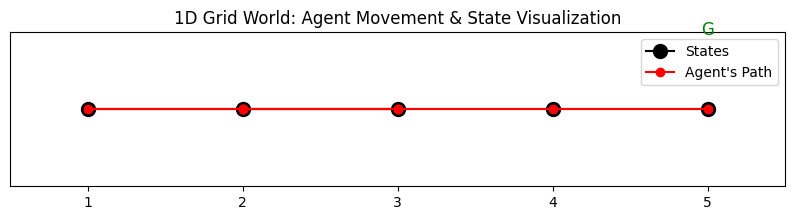

Episode 31: Total Reward: -12


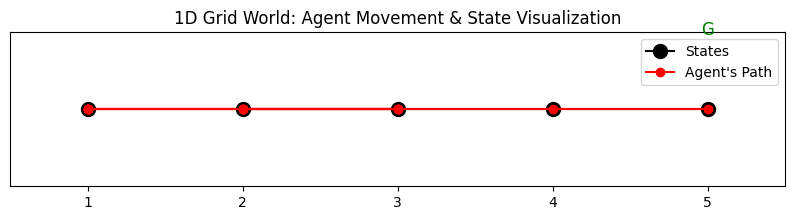

Episode 41: Total Reward: -15


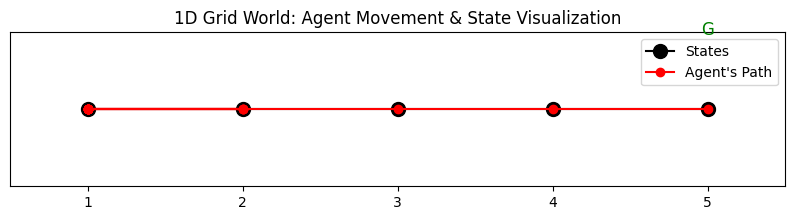

Episode 51: Total Reward: -52


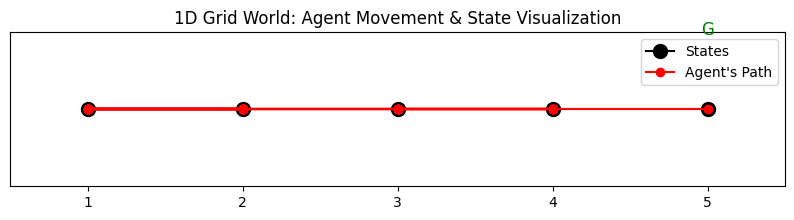

Episode 61: Total Reward: -8


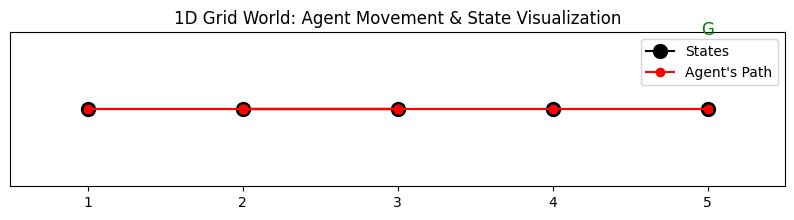

Episode 71: Total Reward: -10


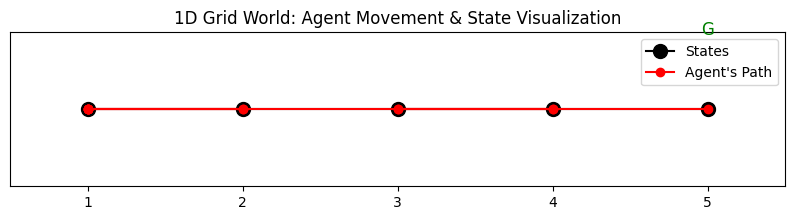

Episode 81: Total Reward: -2


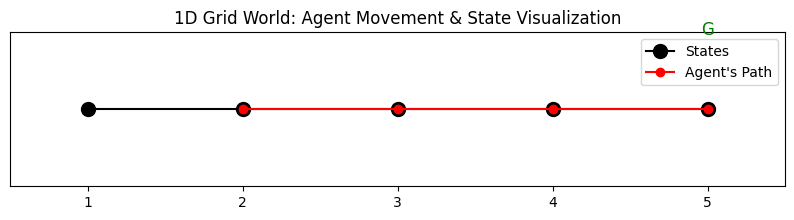

Episode 91: Total Reward: -23


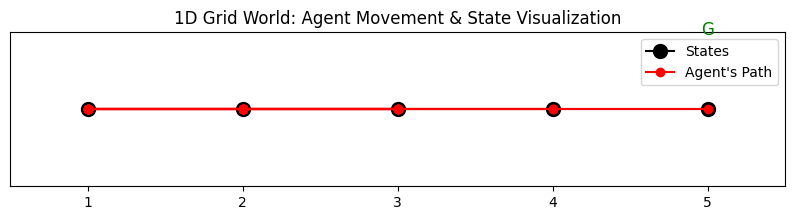


Final State-Value Function (V):
[-7.79806949 -7.11503936 -5.85404458 -3.23273721  0.        ]


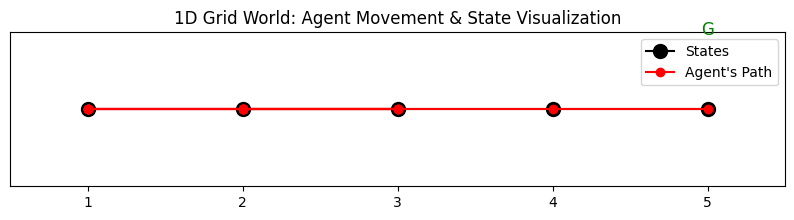

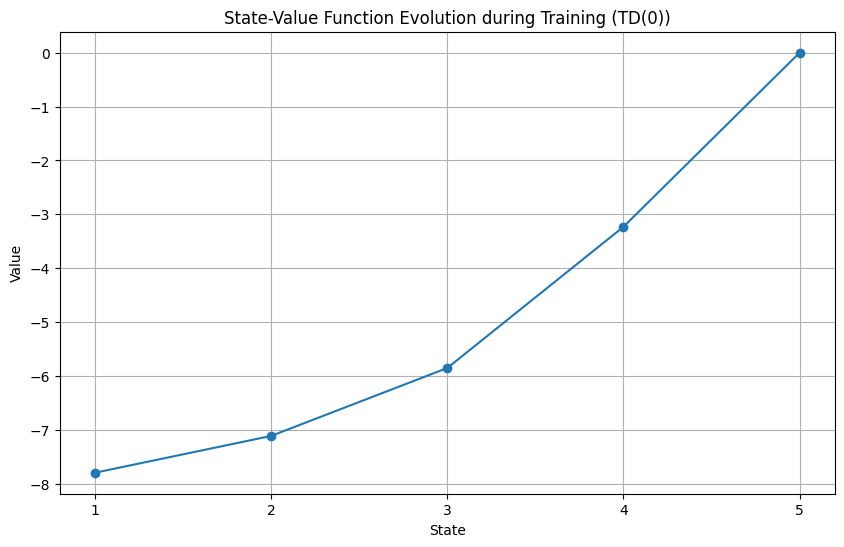

In [9]:
env = GridWorld(size=5)
agent = TD0Agent(env)

agent_paths = agent.learn(episodes=100)

print("\nFinal State-Value Function (V):")
print(agent.V)

env.visualize(agent_paths[-1])

plt.figure(figsize=(10, 6))
plt.plot(agent.V, marker='o', label="State-Value Function V(s)")
plt.title("State-Value Function Evolution during Training (TD(0))")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(0, 5), ['1', '2', '3', '4', '5'])
plt.grid(True)
plt.show()

### **Conclusion**

This implementation demonstrates the TD(0) learning algorithm applied to a simple 1D grid-world environment. Through the bootstrapping process, the agent learns to update the value estimates of each state based on the rewards received during its exploration. By visualizing the agent's path and state-value function, we can observe how the agent progressively improves its understanding of the environment and converges toward an optimal policy.